<a href="https://colab.research.google.com/github/ogbemi-ejegi/startup_valuation/blob/main/company_valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unicorn Companies
A unicorn company is a privately held company with a current valuation of over $1 billion USD. This dataset consists of unicorn companies and startups across the globe as of November 2021, including country of origin, sector, select investors, and valuation of each unicorn.

Note former unicorn companies that have since exited due to IPO or acquisitions are not included in this list.

Challenges are brief tasks designed to help you practice specific skills:

🗺️ Explore: Which investors are the most represented in the dataset?

📊 Visualize: Create a plot that visualizes the valuation of a company by the date it was added. Add annotations to outliers indicating the names of the company.

🔎 Analyze: Do the number of investors a company have correlate with its valuation?

Scenarios are broader questions to help you develop an end-to-end project for your portfolio:

You have been hired as a data scientist for a company that invests in start-ups. Your manager is interested in whether it is possible to predict whether a company reaches a valuation over 5 billion based on characteristics such as its country of origin, its category, and details about its investors.

Using the dataset provided, you have been asked to test whether such predictions are possible, and the confidence one can have in the results.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, steps, findings, and conclusions.

Import Dependencies

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/company_valuation1.csv')

EDA

In [ ]:
df.head()

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
0,Bytedance,$140.00,4/7/2017,China,Artificial intelligence,"""Sequoia Capital China, SIG Asia Investments, ..."
1,SpaceX,$100.30,12/1/2012,United States,Other,"""Founders Fund, Draper Fisher Jurvetson, Rothe..."
2,Stripe,$95.00,1/23/2014,United States,Fintech,"""Khosla Ventures, LowercaseCapital, capitalG"""
3,Klarna,$45.60,12/12/2011,Sweden,Fintech,"""Institutional Venture Partners, Sequoia Capit..."
4,Canva,$40.00,1/8/2018,Australia,Internet software & services,"""Sequoia Capital China, Blackbird Ventures, Ma..."


In [ ]:
df.tail()

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
912,Heyday,$1.00,11/16/2021,United States,E-commerce & direct-to-consumer,"""Khosla Ventures,General Catalyst, Victory Par..."
913,PLACE,$1.00,11/17/2021,United States,Internet software & services,"""Goldman Sachs Asset Management, 3L"""
914,Stytch,$1.00,11/18/2021,United States,Cybersecurity,"""Index Ventures, Benchmark, Thrive Capital"""
915,Owkin,$1.00,11/18/2021,United States,Artificial Intelligence,"""Google Ventures, Cathay Innovation, NJF Capital"""
916,Expel,$1.00,11/18/2021,United States,Cybersecurity,"""Paladin Capital Group, Greycroft, Scale Ventu..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           917 non-null    object
 1   Valuation ($B)    917 non-null    object
 2   Date Added        917 non-null    object
 3   Country           917 non-null    object
 4   Category          917 non-null    object
 5   Select Investors  916 non-null    object
dtypes: object(6)
memory usage: 43.1+ KB


In [ ]:
df.describe()

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
count,917,917,917,917,917,916
unique,916,194,582,47,17,901
top,Bolt,$1.00,7/13/2021,United States,Fintech,Sequoia Capital
freq,2,216,8,469,184,2


In [ ]:
df.Category.value_counts()

Fintech                                  184
Internet software & services             164
E-commerce & direct-to-consumer           97
Artificial intelligence                   69
Health                                    62
"Supply chain, logistics, & delivery"     51
Other                                     51
Cybersecurity                             38
Mobile & telecommunications               36
Data management & analytics               35
Hardware                                  32
Auto & transportation                     30
Edtech                                    27
Consumer & retail                         23
Travel                                    14
Artificial Intelligence                    3
Finttech                                   1
Name: Category, dtype: int64

In [ ]:
#Fix the duplcacy of artificial intelligence and fintech column
df['Category'] = df['Category'].str.replace('Artificial Intelligence', 'Artificial intelligence')
df['Category'] = df['Category'].str.replace('Finttech', 'Fintech')

In [ ]:
df.Category.value_counts()

Fintech                                  185
Internet software & services             164
E-commerce & direct-to-consumer           97
Artificial intelligence                   72
Health                                    62
Other                                     51
"Supply chain, logistics, & delivery"     51
Cybersecurity                             38
Mobile & telecommunications               36
Data management & analytics               35
Hardware                                  32
Auto & transportation                     30
Edtech                                    27
Consumer & retail                         23
Travel                                    14
Name: Category, dtype: int64

The Valuation datatype above is object, this ought to be float. The dateAdded should be date format.
The dollar symbol for in the valuation column should also be removed from those rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           917 non-null    object
 1   Valuation ($B)    917 non-null    object
 2   Date Added        917 non-null    object
 3   Country           917 non-null    object
 4   Category          917 non-null    object
 5   Select Investors  916 non-null    object
dtypes: object(6)
memory usage: 43.1+ KB


In [ ]:
#Rename the valuation column, remove the ($B)
df.rename(columns = {'Valuation ($B) ': 'valuation'}, inplace = True)
df.rename(columns = {'Date Added':'Date_Added'}, inplace = True)

#Change data type 
df['Date_Added'] = df['Date_Added'].astype('datetime64')
df['valuation'] = df['valuation'].str.replace('$', '', regex = True)
df['valuation'] = df['valuation'].astype(float)

#Split the investor column into separate columns by using the "," sign as an indices for separation
df = pd.concat([df, df['Select Investors'].str.split(', ', expand=True)], axis=1)

#Rename the columns created from numerals to alphanumerals
df = df.rename(columns =
               {0: 'Investor1',
                1: 'Investor2',
                2: 'Investor3',
                3: 'Investor4'})



In [ ]:
df.head()


,Company,valuation,Date_Added,Country,Category,Select Investors,Investor1,Investor2,Investor3,Investor4
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,"""Sequoia Capital China, SIG Asia Investments, ...","""Sequoia Capital China",SIG Asia Investments,Sina Weibo,"Softbank Group"""
1,SpaceX,100.3,2012-12-01,United States,Other,"""Founders Fund, Draper Fisher Jurvetson, Rothe...","""Founders Fund",Draper Fisher Jurvetson,"Rothenberg Ventures""",None
2,Stripe,95.0,2014-01-23,United States,Fintech,"""Khosla Ventures, LowercaseCapital, capitalG""","""Khosla Ventures",LowercaseCapital,"capitalG""",None
3,Klarna,45.6,2011-12-12,Sweden,Fintech,"""Institutional Venture Partners, Sequoia Capit...","""Institutional Venture Partners",Sequoia Capital,"General Atlantic""",None
4,Canva,40.0,2018-01-08,Australia,Internet software & services,"""Sequoia Capital China, Blackbird Ventures, Ma...","""Sequoia Capital China",Blackbird Ventures,"Matrix Partners""",None


In [ ]:
df['Investor1'] = df['Investor1'].str.replace('"', '', regex = True)
df['Investor2'] = df['Investor2'].str.replace('"', '', regex = True)
df['Investor3'] = df['Investor3'].str.replace('"', '', regex = True)
df['Investor4'] = df['Investor4'].str.replace('"', '', regex = True)

In [ ]:
df.head()

,Company,valuation,Date_Added,Country,Category,Select Investors,Investor1,Investor2,Investor3,Investor4
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,"""Sequoia Capital China, SIG Asia Investments, ...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Other,"""Founders Fund, Draper Fisher Jurvetson, Rothe...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Stripe,95.0,2014-01-23,United States,Fintech,"""Khosla Ventures, LowercaseCapital, capitalG""",Khosla Ventures,LowercaseCapital,capitalG,None
3,Klarna,45.6,2011-12-12,Sweden,Fintech,"""Institutional Venture Partners, Sequoia Capit...",Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,Canva,40.0,2018-01-08,Australia,Internet software & services,"""Sequoia Capital China, Blackbird Ventures, Ma...",Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


🗺️ Explore: Which investors are the most represented in the dataset?

---



In [ ]:
investors = pd.concat([df['Investor1'],df['Investor2'],
                       df['Investor3'],df['Investor4']],axis = 0)
investors.dropna(inplace=True)
investors.value_counts().nlargest(10)

Accel                          49
Sequoia Capital China          47
Tiger Global Management        41
Sequoia Capital                40
Andreessen Horowitz            38
Insight Partners               38
SoftBank Group                 28
Index Ventures                 27
Lightspeed Venture Partners    26
Tencent Holdings               25
dtype: int64



📊 Visualize: Create a plot that visualizes the valuation of a company by the date it was added. Add annotations to outliers indicating the names of the company.


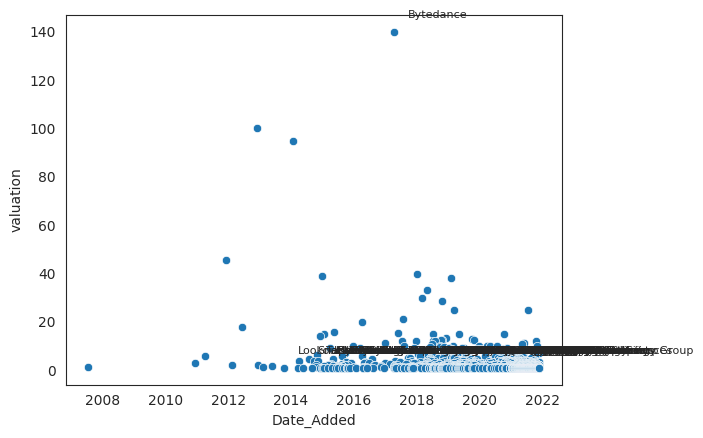

In [ ]:


# Create a scatter plot with Seaborn
sns.scatterplot(x="Date_Added", y="valuation", data=df)

# Add annotations for outliers
#outliers = df[df.valuation == df.valuation.max() or df.valuation == df.valuation.min()]
outliers = df[(df.valuation == df.valuation.max()) | (df.valuation == df.valuation.min())]

for _, row in outliers.iterrows():
    plt.annotate(row.Company, xy=(row.Date_Added, row.valuation), xytext=(10,10), textcoords='offset points', fontsize=8)
    
# Show the plot
plt.show()


In [ ]:
df.columns


Index(['Company', 'valuation', 'Date_Added', 'Country', 'Category',
       'Select Investors', 'Investor1', 'Investor2', 'Investor3', 'Investor4'],
      dtype='object')

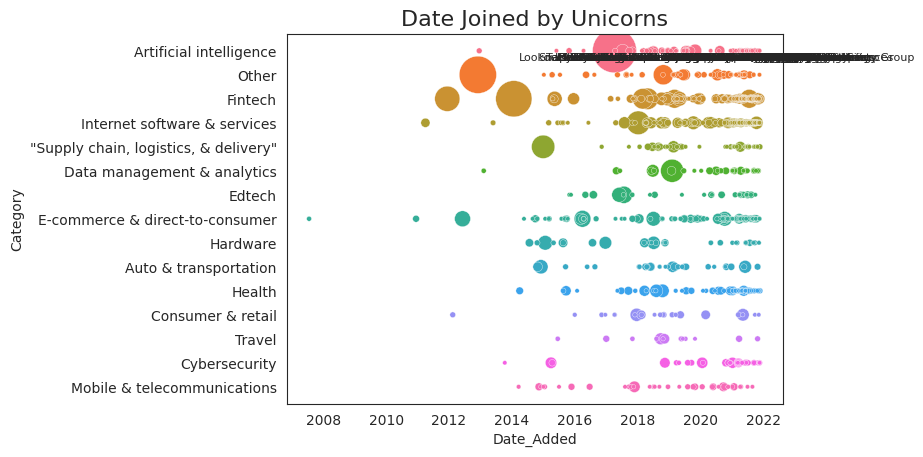

In [ ]:
ax = sns.scatterplot(data=df, x='Date_Added', y='Category', size='valuation', hue='Category', sizes=(10, 1000), legend=False)

#outliers = df[df.valuation == df.valuation.max() or df.valuation == df.valuation.min()]
outliers = df[(df.valuation == df.valuation.max()) | (df.valuation == df.valuation.min())]

for _, row in outliers.iterrows():
    plt.annotate(row.Company, xy=(row.Date_Added, row.valuation), xytext=(10,10), textcoords='offset points', fontsize=8)

#sns.scatterplot(data=df, x='Date_Added', y='Category', hue='Category', sizes=(0, 0), marker='X', ax=ax, alpha=0.9)
#Add plot title
plt.title('Date Joined by Unicorns', fontsize=16)

#Add plot background
sns.set_style('white')

plt.show()




🔎 Analyze: Do the number of investors a company have correlate with its valuation?

In [ ]:
df['Select Investors'] = df['Select Investors'].astype(str)
df['Select Investors'] = df['Select Investors'].str.split(',')

# count the number of investors for each company
df['Investor Count'] = df['Select Investors'].apply(lambda x: len(x))

# group the data by investor count and calculate the average valuation
grouped = df.groupby('Investor Count')['valuation'].mean()

# calculate the correlation coefficient between investor count and valuation
corr_coef = df['Investor Count'].corr(df['valuation'])

print('Correlation coefficient:', corr_coef)


Correlation coefficient: 0.07834075495640906


You have been hired as a data scientist for a company that invests in start-ups. Your manager is interested in whether it is possible to predict whether a company reaches a valuation over 5 billion based on characteristics such as its country of origin, its category, and details about its investors.

Using the dataset provided, you have been asked to test whether such predictions are possible, and the confidence one can have in the results.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, steps, findings, and conclusions.

In [ ]:
df['Select Investors'] = df['Select Investors'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           917 non-null    object        
 1   valuation         917 non-null    float64       
 2   Date_Added        917 non-null    datetime64[ns]
 3   Country           917 non-null    object        
 4   Category          917 non-null    object        
 5   Select Investors  917 non-null    object        
 6   Investor1         916 non-null    object        
 7   Investor2         872 non-null    object        
 8   Investor3         788 non-null    object        
 9   Investor4         7 non-null      object        
 10  Investor Count    917 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 78.9+ KB


In [ ]:
df.columns

Index(['Company', 'valuation', 'Date_Added', 'Country', 'Category',
       'Select Investors', 'Investor1', 'Investor2', 'Investor3', 'Investor4',
       'Investor Count'],
      dtype='object')

In [ ]:
# Convert 'Date_Added' column to numerical values
df['Date_Added'] = df['Date_Added'].astype(int) / 10**9

# Drop original investors column
df.drop('Select Investors', axis=1, inplace=True)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Category', 'Country', 'Investor1', 'Investor2', 'Investor3', 'Investor4'], dtype=float)


# Split dataset into training and testing sets
X = df.drop(['Company', 'valuation'], axis=1)
y = df['valuation'] > 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on testing set and evaluate accuracy
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.8586956521739131


In [ ]:
'''

mlb = MultiLabelBinarizer()
df['Select Investors'] = df['Select Investors'].fillna('')
investors_df = pd.DataFrame(mlb.fit_transform(df['Select Investors'].str.split(',')), columns=mlb.classes_, index=df.index)

#print(investors_df)

# Concatenate original dataframe with binary investor dataframe
df = pd.concat([df, investors_df], axis=1)

# Drop original investors column
df.drop('investors', axis=1, inplace=True)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['industry', 'country'])

# Split dataset into training and testing sets
X = df.drop(['company', 'valuation'], axis=1)
y = df['valuation'] > 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on testing set and evaluate accuracy
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
'''

'\n\nmlb = MultiLabelBinarizer()\ndf[\'Select Investors\'] = df[\'Select Investors\'].fillna(\'\')\ninvestors_df = pd.DataFrame(mlb.fit_transform(df[\'Select Investors\'].str.split(\',\')), columns=mlb.classes_, index=df.index)\n\n#print(investors_df)\n\n# Concatenate original dataframe with binary investor dataframe\ndf = pd.concat([df, investors_df], axis=1)\n\n# Drop original investors column\ndf.drop(\'investors\', axis=1, inplace=True)\n\n# One-hot encode categorical columns\ndf = pd.get_dummies(df, columns=[\'industry\', \'country\'])\n\n# Split dataset into training and testing sets\nX = df.drop([\'company\', \'valuation\'], axis=1)\ny = df[\'valuation\'] > 5\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Train logistic regression model\nlr = LogisticRegression()\nlr.fit(X_train, y_train)\n\n# Make predictions on testing set and evaluate accuracy\ny_pred = lr.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accu